In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [60]:
# Creating the 'multiplier' dataframe
multiplier_values = {
    '26': [24, 47, 73, 77, 12],
    '27': [70, 82, 89, 83, 27],
    '28': [41, 87, 100, 85, 52],
    '29': [21, 80, 90, 79, 15],
    '30': [60, 35, 17, 55, 30]
}
multiplier = pd.DataFrame(multiplier_values, index=['G', 'H', 'I', 'J', 'K'])

# Creating the 'hunters' dataframe
hunters_values = {
    '26': [2, 3, 4, 5, 2],
    '27': [4, 5, 5, 5, 3],
    '28': [3, 5, 8, 5, 4],
    '29': [2, 5, 7, 5, 2],
    '30': [4, 3, 2, 4, 3]
}
hunters = pd.DataFrame(hunters_values, index=['G', 'H', 'I', 'J', 'K'])


In [61]:
profit_0 = multiplier / hunters

In [62]:
mean_profit0 = profit_0.values.flatten().mean()
max_profit_0 = profit_0.values.flatten().max()
med_profit_0 = np.median(profit_0.values.flatten())


print(f'Maximum Profit: {max_profit_0} \n Mean Profit: {mean_profit0} \n Median Profit: {med_profit_0}')

Maximum Profit: 18.25 
 Mean Profit: 13.590285714285715 
 Median Profit: 13.75


(array([1., 1., 2., 2., 2., 3., 2., 3., 5., 4.]),
 array([ 6.   ,  7.225,  8.45 ,  9.675, 10.9  , 12.125, 13.35 , 14.575,
        15.8  , 17.025, 18.25 ]),
 <BarContainer object of 10 artists>)

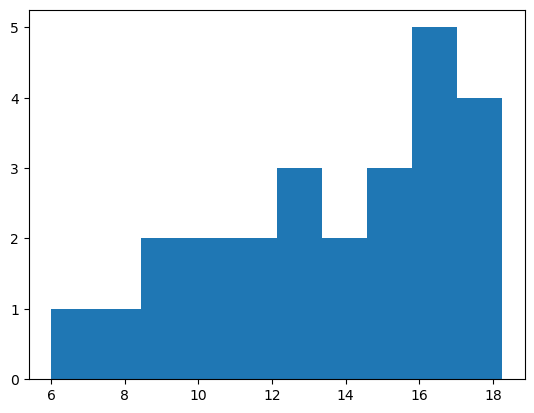

In [63]:
plt.hist(profit_0.values.flatten())

In [132]:
# Flatten the dataframes to create a list of all possible combinations
profits_flat = profit_0.unstack().reset_index()
profits_flat.columns = ['Number', 'Row', 'profit_0']

# Creating the combination column as RowNumber (e.g., G26)
profits_flat['Combination'] = profits_flat['Row'] + profits_flat['Number']

# Selecting only the required columns and sorting by profit_0
profits_flat = profits_flat[['Combination', 'profit_0']].sort_values(by='profit_0', ascending=False)

# Flatten the 'multiplier' and 'hunters' dataframes for merging
multipliers_flat = multiplier.unstack().reset_index(name='Multiplier_Value')
hunters_flat = hunters.unstack().reset_index(name='Hunters_Value')
multipliers_flat['Combination'] = multipliers_flat['level_1'] + multipliers_flat['level_0']
hunters_flat['Combination'] = hunters_flat['level_1'] + hunters_flat['level_0']

# Merge with 'profits_flat' dataframe
profits_flat = profits_flat.merge(multipliers_flat, left_on='Combination', right_on='Combination')
profits_flat = profits_flat.merge(hunters_flat, left_on='Combination', right_on='Combination')

profits_flat = profits_flat[['Combination', 'profit_0', 'Multiplier_Value', 'Hunters_Value']]

In [126]:
def add_purchase_P(profits_flat, probability_buy=2/3, n_trials=10000, index=0):
    purchase_results = np.zeros(len(profits_flat))  # Initialize an array to hold the purchase results

    # Perform the Monte Carlo simulation
    for _ in range(n_trials):
        purchased = 0
        for idx in range(len(profits_flat)):
            # Stop the trial if already purchased 3 items
            if purchased >= 3:
                break
            # If the purchase is successful (based on probability_buy), mark it as 1
            if np.random.rand() < probability_buy:
                purchase_results[idx] += 1
                purchased += 1

    # Calculate the purchase probabilities
    profits_flat[f'purchase_{index}'] = 100 * purchase_results / n_trials

    return profits_flat


In [133]:
probability_buy = 2/3
n_trials=100000
ratio_i_to_iminus1 = 0.6

profits_flat = add_purchase_P(profits_flat, probability_buy=probability_buy, n_trials=n_trials, index=0)
profits_flat['profit_1'] = profits_flat['Multiplier_Value'] / (profits_flat['Hunters_Value'] + profits_flat['purchase_0'])
profits_flat = profits_flat.sort_values(by='profit_1', ascending=False)

profits_flat = add_purchase_P(profits_flat, probability_buy=probability_buy, n_trials=n_trials, index=1)
profits_flat['profit_2'] = profits_flat['Multiplier_Value'] / (profits_flat['Hunters_Value'] + (1-ratio_i_to_iminus1) * profits_flat['purchase_0'] + ratio_i_to_iminus1 * profits_flat['purchase_1'])
profits_flat = profits_flat.sort_values(by='profit_2', ascending=False)

#profits_flat = add_purchase_P(profits_flat, probability_buy=probability_buy, n_trials=n_trials, index=2)
#profits_flat['profit_3'] = profits_flat['Multiplier_Value'] / (profits_flat['Hunters_Value'] + (1-ratio_i_to_iminus1) * profits_flat['purchase_1'] + ratio_i_to_iminus1 * profits_flat['purchase_2'])
#profits_flat = profits_flat.sort_values(by='profit_3', ascending=False)


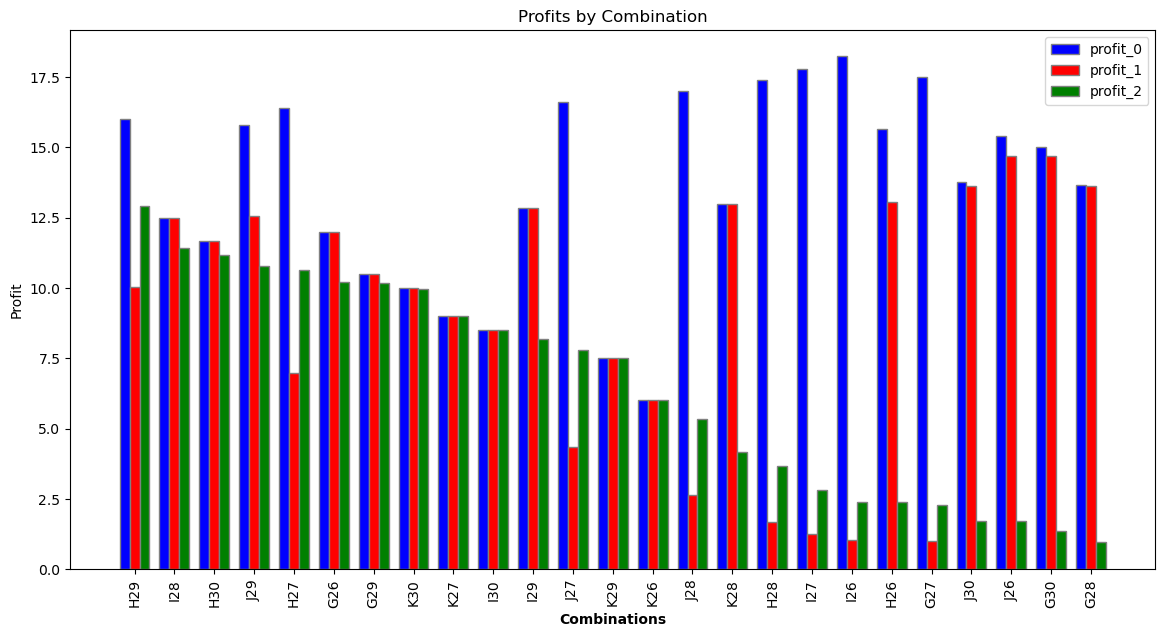

,Combination,profit_0,Multiplier_Value,Hunters_Value,purchase_0,profit_1,purchase_1,profit_2
7,H29,16.000000,80,5,2.967,10.041421,0.028,12.895738
16,I28,12.500000,100,8,0.002,12.496876,1.274,11.408753
18,H30,11.666667,35,3,0.000,11.666667,0.227,11.160003
8,J29,15.800000,79,5,1.287,12.565612,3.027,10.776156
6,H27,16.400000,82,5,6.749,6.979317,0.000,10.649904
17,G26,12.000000,24,2,0.000,12.000000,0.580,10.221465
19,G29,10.500000,21,2,0.000,10.500000,0.101,10.191206
20,K30,10.000000,30,3,0.000,10.000000,0.015,9.970090
21,K27,9.000000,27,3,0.000,9.000000,0.008,8.985623
22,I30,8.500000,17,2,0.000,8.500000,0.005,8.487269


In [136]:
# Plotting
plt.figure(figsize=(14, 7))
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(profits_flat))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
#r4 = [x + bar_width for x in r3]

# Make the plot
plt.bar(r1, profits_flat['profit_0'], color='blue', width=bar_width, edgecolor='grey', label='profit_0')
plt.bar(r2, profits_flat['profit_1'], color='red', width=bar_width, edgecolor='grey', label='profit_1')
plt.bar(r3, profits_flat['profit_2'], color='green', width=bar_width, edgecolor='grey', label='profit_2')
#plt.bar(r4, profits_flat['profit_3'], color='yellow', width=bar_width, edgecolor='grey', label='profit_3')


# Add xticks on the middle of the group bars
plt.xlabel('Combinations', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(profits_flat))], profits_flat['Combination'], rotation=90)
plt.ylabel('Profit')
plt.title('Profits by Combination')

# Create legend & Show graphic
plt.legend()
plt.show()

(profits_flat)

In [137]:
def run_monte_carlo_simulation(profits_flat, probability_buy, n_trials, max_purchases):
    # Add purchase probability columns and recalculate profit after each purchase
    for i in range(max_purchases):
        purchase_column = f'purchase_{i}'
        profits_flat[purchase_column] = 0

        for _ in range(n_trials):
            purchased = 0
            for idx in profits_flat.index:
                if purchased >= 3:  # Limit of purchases per trial
                    break
                if np.random.rand() < probability_buy:
                    profits_flat.at[idx, purchase_column] += 1
                    purchased += 1

        # Calculate purchase probabilities
        profits_flat[purchase_column] = profits_flat[purchase_column] / n_trials

        # Recalculate profit
        profit_column = f'profit_{i+1}'
        try:
            cumulative_purchases = 50 * profits_flat[f'purchase_{i}'] + 50 * profits_flat[f'purchase_{i-1}']
        except:
            cumulative_purchases = 100 * profits_flat[f'purchase_{i}']
        profits_flat[profit_column] = profits_flat['Multiplier_Value'] / (profits_flat['Hunters_Value'] + cumulative_purchases)

        # Sort by the new profit column
        profits_flat = profits_flat.sort_values(by=profit_column, ascending=False)

    return profits_flat

In [141]:
profits_flat_08 = run_monte_carlo_simulation(profits_flat, probability_buy=0.8, n_trials=1000, max_purchases=2)
profits_flat_05 = run_monte_carlo_simulation(profits_flat, probability_buy=0.5, n_trials=1000, max_purchases=20)

In [142]:
profits_flat_05[['Combination','profit_0','Multiplier_Value','Hunters_Value','profit_19','purchase_19','profit_20']]

,Combination,profit_0,Multiplier_Value,Hunters_Value,profit_19,purchase_19,profit_20
5,J27,16.600000,83,5,2.699187,0.006,15.514019
11,G30,15.000000,60,4,1.993355,0.000,15.000000
13,G28,13.666667,41,3,1.387479,0.000,13.666667
12,J30,13.750000,55,4,2.071563,0.001,13.580247
14,K28,13.000000,52,4,2.653061,0.003,12.235294
15,I29,12.857143,90,7,4.603581,0.039,8.955224
23,K29,7.500000,15,2,1.546392,0.000,7.500000
10,J26,15.400000,77,5,5.384615,0.064,7.096774
24,K26,6.000000,12,2,2.608696,0.001,5.581395
16,I28,12.500000,100,8,6.309148,0.114,5.249344


In [140]:
profits_flat_08

,Combination,profit_0,Multiplier_Value,Hunters_Value,purchase_0,profit_1,purchase_1,profit_2
10,J26,15.400000,77,5,0.000,15.400000,0.003,14.951456
11,G30,15.000000,60,4,0.000,15.000000,0.002,14.634146
12,J30,13.750000,55,4,0.000,13.750000,0.000,13.750000
13,G28,13.666667,41,3,0.000,13.666667,0.000,13.666667
14,K28,13.000000,52,4,0.000,13.000000,0.000,13.000000
15,I29,12.857143,90,7,0.000,12.857143,0.000,12.857143
9,H26,15.666667,47,3,0.000,15.666667,0.017,12.207792
5,J27,16.600000,83,5,0.000,16.600000,0.045,11.448276
20,K30,10.000000,30,3,0.008,7.894737,0.000,8.823529
21,K27,9.000000,27,3,0.002,8.437500,0.000,8.709677
